In [1]:
from scipy.stats import norm
import matplotlib.pyplot as plt

from pandas_datareader import data 
import math
from math import sqrt
import pandas as pd 
import numpy as np  

In [2]:
apple_data = data.DataReader('AAPL', 'yahoo',start='1/1/2006',end='31/12/2017')

In [3]:
apple_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,10.678572,10.321428,10.340000,10.678572,201808600.0,7.120505
2006-01-04,10.854285,10.642858,10.732857,10.710000,154900900.0,7.141460
2006-01-05,10.700000,10.535714,10.690000,10.625714,112355600.0,7.085258
2006-01-06,10.957143,10.650000,10.750000,10.900000,176114400.0,7.268152
2006-01-09,11.028571,10.820000,10.961429,10.864285,168760200.0,7.244339


In [4]:
apple_data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-22,175.419998,174.500000,174.679993,175.009995,16114600.0,171.685074
2017-12-26,171.470001,169.679993,170.800003,170.570007,33185500.0,167.329453
2017-12-27,170.779999,169.710007,170.100006,170.600006,21498200.0,167.358871
2017-12-28,171.850006,170.479996,171.000000,171.080002,16480200.0,167.829758
2017-12-29,170.589996,169.220001,170.520004,169.229996,25884400.0,166.014908


In [5]:
apple_data.to_csv("apple_stock_price_data_from_2006_to_2017.csv", index=True)

In [6]:
import fileinput
import sys
import os

inputFileName = "apple_stock_price_data_from_2006_to_2017.csv"
outputFileName = os.path.splitext(inputFileName)[0] + "_modified.csv"

with open(outputFileName, "w") as outfile:
    for line in fileinput.input(
        [inputFileName],
        inplace=False):
        if fileinput.isfirstline():
            outfile.write('Date,High,Low,Open,Close,Volume,Adj_Close\n')
        else:
            outfile.write(line)

In [7]:
file_1 = open("apple_stock_price_data_from_2006_to_2017_modified.csv")
row_count = len(file_1.readlines())
print(row_count)

3021


In [8]:
df = pd.read_csv('apple_stock_price_data_from_2006_to_2017_modified.csv', nrows = 3021)
train=df[0:2000] 
test=df[2000:]
#Aggregating the dataset at daily level
df.Timestamp = pd.to_datetime(df.Date,format='%Y-%m-%d') 
df.index = df.Timestamp 
df = df.resample('D').mean()
train.Timestamp = pd.to_datetime(train.Date,format='%Y-%m-%d') 
train.index = train.Timestamp 
train = train.resample('D').mean() 
test.Timestamp = pd.to_datetime(test.Date,format='%Y-%m-%d') 
test.index = test.Timestamp 
test = test.resample('D').mean()

C:\Users\Home\Anaconda2\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """
C:\Users\Home\Anaconda2\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
C:\Users\Home\Anaconda2\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # This is added back by InteractiveShellApp.init_path()


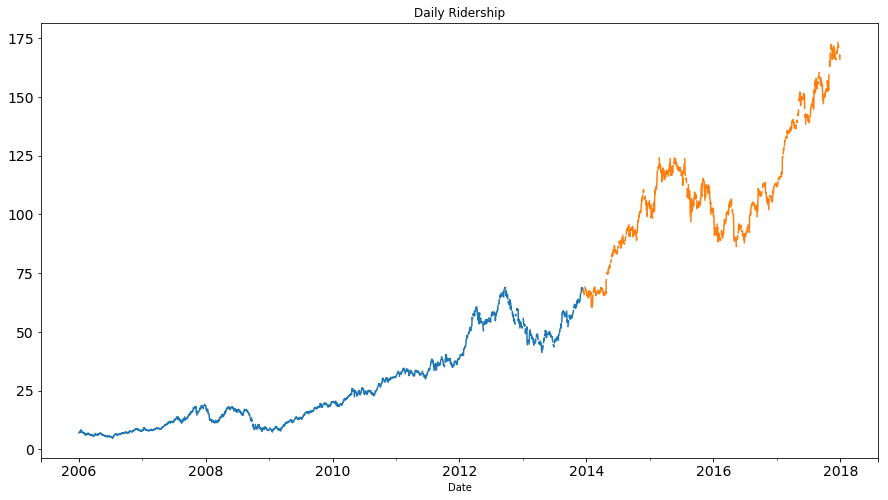

In [9]:
#Plotting data
train.Adj_Close.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
test.Adj_Close.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
plt.show()

In [10]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm

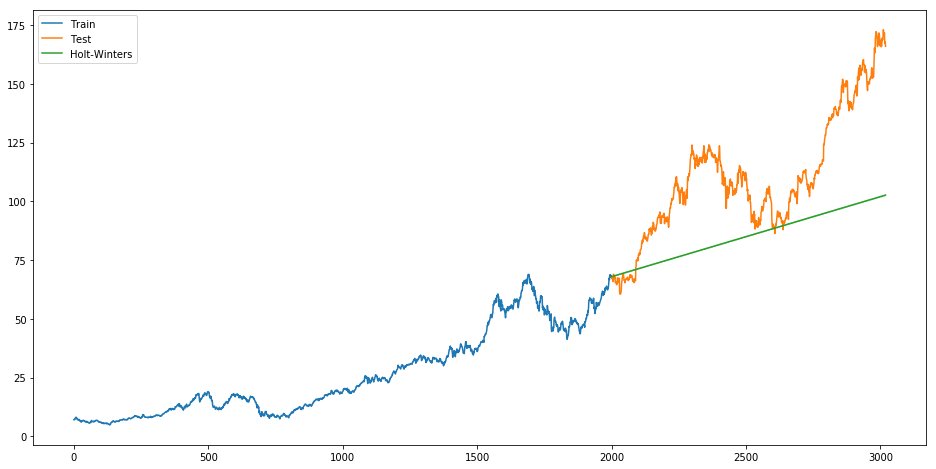

In [11]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df = pd.read_csv('apple_stock_price_data_from_2006_to_2017_modified.csv')
df.index.freq = 'MS'
train, test = df.iloc[:2000, 6:7], df.iloc[2000:, 6:7]
model = ExponentialSmoothing(train, seasonal_periods=10, trend='add', seasonal='add').fit()
pred = model.predict(start=test.index[0], end=test.index[-1])
plt.figure(figsize=(16,8))

plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')
